In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

### Familiarización con los datos

In [2]:
url = "Dataset/datos_negocios_limpios.csv"
df = pd.read_csv(url)

def funcion1(a):
    if(a!="Sin atributos"):
        return eval(a)

def funcion2(a):
    if(a!="Sin horas"):
        return eval(a)
    
df["categorias"]=df["categorias"].apply(lambda s: eval(s))
df["atributos"]=df["atributos"].apply(lambda s: funcion1(s))
df["horas"]=df["horas"].apply(lambda s: funcion2(s) )
df=df.drop(list(df.columns)[0],axis=1)
df

nombre                       direccion  \
0            Arizona Biltmore Golf Club     2818 E Camino Acequia Drive   
1            Emerald Chinese Restaurant            30 Eglinton Avenue W   
2           Musashi Japanese Restaurant       10110 Johnston Rd, Ste 15   
3       Farmers Insurance - Paul Lorenz   15655 W Roosevelt St, Ste 237   
4                   Queen City Plumbing  4209 Stuart Andrew Blvd, Ste F   
...                                 ...                             ...   
192604               Sanderson Plumbing                   Sin direccion   
192605                         Chapters              17440 Yonge Street   
192606                   Phoenix Pavers                 21230 N 22nd St   
192607            Beasley's Barber Shop                  4406 E Main St   
192608                   Oriental Relax           3735 S Las Vegas Blvd   

                 ciudad estado codigo_postal    latitud    longitud  \
0               Phoenix     AZ         85016  33.522143 -112.018481   
1           Mississauga     ON       L5R 3E7  43.605499  -79.652289   
2             Charlotte     NC         28210  35.092564  -80.859132   
3              Goodyear     AZ         85338  33.455613 -112.395596   
4             Charlotte     NC         28217  35.190012  -80.887223   
...                 ...    ...           ...        ...         ...   
192604  North Las Vegas     NV         89032  36.213732 -115.177059   
192605        Newmarket     ON       L3Y 6Y9  44.052658  -79.481850   
192606          Phoenix     AZ         85024  33.679992 -112.035569   
192607             Mesa     AZ         85205  33.416137 -111.735743   
192608        Las Vegas     NV         89109  36.107267 -115.171920   

        puntuacion  num_revisiones  abierto  \
0              3.0               5        0   
1              2.5             128        1   
2              4.0             170        1   
3              5.0               3        1   
4              4.0               4        1   
...            ...             ...      ...   
192604         5.0               9        1   
192605         4.5               3        1   
192606         4.5              14        1   
192607         4.5              15        1   
192608         4.0               3        0   

                                                atributos  \
0                                {'GoodForKids': 'False'}   
1       {'RestaurantsReservations': 'True', 'GoodForMe...   
2       {'GoodForKids': 'True', 'NoiseLevel': 'u'avera...   
3                                                    None   
4       {'BusinessAcceptsBitcoin': 'False', 'ByAppoint...   
...                                                   ...   
192604             {'BusinessAcceptsCreditCards': 'True'}   
192605  {'RestaurantsPriceRange2': '2', 'BikeParking':...   
192606  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
192607  {'RestaurantsPriceRange2': '1', 'BusinessAccep...   
192608  {'BikeParking': 'False', 'RestaurantsPriceRang...   

                                               categorias  \
0                                    [Golf,  Active Life]   
1       [Specialty Food,  Restaurants,  Dim Sum,  Impo...   
2                   [Sushi Bars,  Restaurants,  Japanese]   
3                        [Insurance,  Financial Services]   
4       [Plumbing,  Shopping,  Local Services,  Home S...   
...                                                   ...   
192604  [Water Purification Services,  Water Heater In...   
192605          [Books,  Mags,  Music & Video,  Shopping]   
192606  [Home Services,  Contractors,  Landscaping,  M...   
192607                          [Beauty & Spas,  Barbers]   
192608                          [Massage,  Beauty & Spas]   

                                                    horas  
0                                                    None  
1       {'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...  
2       {'Monday': '17:30-21:30', 'Wednesday': '17:30-...  
3       

En un primer lugar, como estamos tratando un csv guardado por nosotros en la parte de preprocesado (en el notebook de preprocesado_negocios), hemos comprobado que en el csv los atributos con listas y diccionarios se guardan como string, es decir, "[ "" ] " (en el caso de las listas y " { "" } " (en el caso de los diccionarios.

Por ello, para facilitar la utilización de dichos campos hemos decido pasar los valores de dichos atributos a código python. 

In [3]:
print(list(df.columns))

['nombre', 'direccion', 'ciudad', 'estado', 'codigo_postal', 'latitud', 'longitud', 'puntuacion', 'num_revisiones', 'abierto', 'atributos', 'categorias', 'horas']


Nos encontramos en un dataset de negocios en el que se habla de donde se situan, que puntuacion tienen y horario de apertura y caracteristicas del negocio. Para entender correctamente qué significa cada atributo, vamos a explicarlos uno a uno y a exponer algunas suposición que nos hacemos apriori:

   - **negocio_id**: Una cadena de caracteres alfanumerica que identifica unequivocamente a un negocio.

   - **nombre**: El nombre del negocio. Podemos suponer que puede incluir algunas de las categorias del negocio, dando una buena pista a la hora de predecir las categorias de un negocio.

   - **direccion, ciudad, estado, codigo postal, latitud y longitud**: Indican la posicion geografica del negocio.

   - **puntucacion**: indica que tan buenos son los negcion segun los usuarios quelos han puntuado.

   - **num_revisiones**: Número de veces que usuarios han puntuado este negocio.

   - **abierto**: Indica si el negocio sigue ofreciendo servicios o ha cerrado. Se puede maginar que un negocio con muchas revisiones es dificil que cierre porque tiene muchos clientes.
   
   - **atributos**: String que contiene un diccionario que incluye diferentes caracteristicas que puede cumplir el negocio, como ser bueno para niños o el nivel de ruido que tiene.
   
   - **categorias**: String que contiene una lista de las categorias que cumple el negocio.
   
   - **horas**: String que contiene un diccionario que indica las diferentes horas a las que abre el negocio cada dia.


### Análisis descriptivo de los datos

In [4]:
df.describe()

latitud       longitud     puntuacion  num_revisiones  \
count  192609.000000  192609.000000  192609.000000   192609.000000   
mean       38.541803     -97.594785       3.585627       33.538962   
std         4.941964      16.697725       1.018458      110.135224   
min        33.204642    -115.493471       1.000000        3.000000   
25%        33.637408    -112.274677       3.000000        4.000000   
50%        36.144815    -111.759323       3.500000        9.000000   
75%        43.602989     -79.983614       4.500000       25.000000   
max        51.299943     -72.911982       5.000000     8348.000000   

             abierto  
count  192609.000000  
mean        0.823040  
std         0.381635  
min         0.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

Observando la tabla descriptiva de los datos, podemos obtener la siguiente información:
   - **Puntuación**: Podemos observar que la media de la puntuación de los negocios esta en torno al 3.6.

   - **Num_revisiones**: Podemos observar que el valor del número de revisiones máximo es muy elevado en comparación con la media de revisiones, lo que quiere decir que existen negocios muy populares entre la gente. 
   - **Abierto**: 
        - El porcentaje de negocios abiertos es del **82,3%**
        - El porcentaje de negocios cerrados es del **17,7%**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

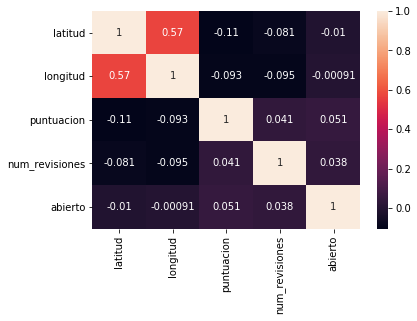

In [6]:
sns.heatmap(df.corr(), annot = True)

En este caso, de la matriz de correlación no se puede sacar gran información ya que el único que presenta cierta correlación son la latitud y longitud entre si. Pero el resto de variables númericas no presentan ninguna correlación.

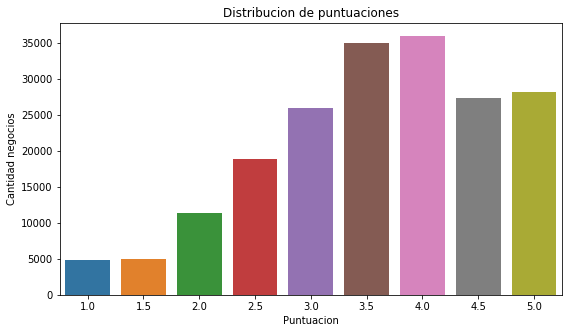

In [7]:
x = df["puntuacion"].value_counts()
x = x.sort_index()
plt.figure(figsize=(9,5))
ax=sns.barplot(x.index, x.values)
plt.title ("Distribucion de puntuaciones")
plt.ylabel("Cantidad negocios")
plt.xlabel("Puntuacion")
plt.show()


En esta distribución de puntaciones podemos comprobar que para todos los negocios las mayoria de las puntuaciones se centran en torno a 3.5 y 4. 

Una vez explorado el dataframe generado por el preprocesado del fichero original hemos visto que no nos ha aportado mucha información por lo que hemos decidido procesar de nuevo y esta vez hemos generado un fichero con un atributo por categoría. Este proceso se ha realizado en el notebook llamado procesado_categorias.

### Analisis de categorias


En este caso los atributos son los mismos que en el fichero utilizado en las explicaciones anteriores.

In [8]:
url = "Dataset/datos_negocios_limpios_categoriasExtendidas.csv"
df = pd.read_csv(url)
df=df.drop(list(df.columns)[0],axis=1)
grouped = df.groupby('abierto')
abiertos=grouped.get_group(1)
cerrados=grouped.get_group(0)

MemoryError: Unable to allocate array with shape (1303, 192609) and data type int64

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot (x="abierto", data=df)
x = abiertos["puntuacion"].value_counts()
y = cerrados["puntuacion"].value_counts()
x = x.sort_index()
y = y.sort_index()
plt.figure(figsize=(9,5))
ax=sns.barplot(x.index, x.values)
plt.title ("Distribucion de puntuaciones")
plt.ylabel("Cantidad negocios abiertos")
plt.xlabel("Puntuacion")
plt.show()
plt.figure(figsize=(9,5))
ay=sns.barplot(y.index, y.values)
plt.title ("Distribucion de puntuaciones")
plt.ylabel("Cantidad negocios cerrados")
plt.xlabel("Puntuacion")
plt.show()

En estas distribuciones podemos comprobar la que la cantidad de negocios abiertos es muchos mayor que el de cerrados. Por ello, hemos decidido mirar si algun indicativo en las puntuaciones que lleven a cerrar a un negocio. Pero como podemos observar en las gráficas de distribuciones no hay gran diferencia a excepción de negocios que tengan más de 3.5 de puntuación.

Ahora vamos a comprobar si hay alguna diferencia entre los negocios que han cerrado con los que siguen abiertos para lo que vamos a comprobar que categorías son más frecuentes.

In [ ]:
a=df.describe()
a=a.drop(["latitud","longitud","puntuacion","num_revisiones","abierto"], axis=1)
a=a.drop(["max","75%","50%","25%","min","std","count"], axis=0)
a=a.sort_values(by="mean",axis=1, ascending=False)
a

El principal tipo de negocio que podemos encontrar dentro del dataset (teniendo en cuenta todos los negocios tanto abiertos como cerrados) son los restaurantes, tiendas y comida.

Por lo que ahora vamos a observar si hay algun tipo de negocio que tienda más a cerrar que otro.

In [ ]:
b=pd.DataFrame({'puntuacion' : []})
b["puntuacion"]=df["puntuacion"]
b["num_revisiones"]=df["num_revisiones"]
b["abierto"]=df["abierto"]

In [ ]:
buenos = df.loc[df['puntuacion'] >= 3.5, df.columns]
malos = df.loc[df['puntuacion'] <= 2.5, df.columns]
buenos = buenos.drop("puntuacion",axis=1)
malos = malos.drop("puntuacion",axis=1)

In [ ]:
a=buenos.describe()
a=a.drop(["latitud","longitud","num_revisiones","abierto"], axis=1)
a=a.drop(["max","75%","50%","25%","min","std","count"], axis=0)
a.sort_values(by="mean",axis=1, ascending=False)

In [ ]:
a=malos.describe()
a=a.drop(["latitud","longitud","num_revisiones","abierto"], axis=1)
a=a.drop(["max","75%","50%","25%","min","std","count"], axis=0)
a.sort_values(by="mean",axis=1, ascending=False)

Como podemos observer en estas dos descripciones el tipo de negocio que predomina entre los abiertos son los restaurantes al igual que pasa en el caso de negocios que estan cerrados. Esto también tiene cierta lógica puesto que hay un mayor número de restaurantes entre el total de negocios.

Ahora vamos a comprobar en que estados se encuentra el mayor número de negocios.

In [ ]:
x=df["estado"].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax=sns.barplot(x.index, x.values)
plt.title("Que estado tiene mas negocios?")
l, label = plt.xticks()
plt.setp(label, rotation=45)
plt.ylabel("Numero de negocios")
plt.xlabel("Estado")
plt.show()


Aqui podemos comprobar cuales son los estados que más negocios tienen, en este caso los que destacan son Arizona y Nevada en EEUU y Ontario en Canadá. 

Ahora vamos a comprobar cuales son las ciudades que más negocios tengan para su posterior uso en diferente comprobaciones.

In [ ]:
y=df["ciudad"].value_counts()
y=y.sort_values(ascending=False)
y=y.iloc[0:6]
plt.figure(figsize=(16,4))
ay=sns.barplot(y.index, y.values)
plt.title("Que ciudad tiene mas negocios?")
l, label = plt.xticks()
plt.setp(label, rotation=45)
plt.ylabel("Numero de negocios")
plt.xlabel("Ciudad")
plt.show()


Aqui podemos comprobar que el mayor número de negocios se encuentran en Las Vegas, Toronto y Phoenix que son ciudades de los tres estados que más negocios tienen.

In [ ]:
df.plot(kind="scatter", x="longitud", y="latitud", alpha=1) 
plt.show()

In [ ]:
grouped = df.groupby('estado')
dfAz=grouped.get_group("AZ")

In [ ]:
dfAz.plot(kind="scatter", x="longitud", y="latitud",c="puntuacion",label="puntuacion", alpha=0.4,cmap=plt.get_cmap("jet")) 
plt.show()

In [ ]:
grouped = dfAz.groupby('ciudad')
dfPhx=grouped.get_group("Phoenix")

In [ ]:
dfPhx.plot(kind="scatter", x="longitud", y="latitud",c="puntuacion",label="puntuacion", alpha=0.4,cmap=plt.get_cmap("jet")) 
plt.show()

In [ ]:
dfPhx.groupby("abierto").get_group(1).plot(kind="scatter", x="longitud", y="latitud",c="puntuacion",label="puntuacion", alpha=0.4,cmap=plt.get_cmap("jet")) 
plt.show()

In [ ]:
dfPhx.groupby("abierto").get_group(0).plot(kind="scatter", x="longitud", y="latitud",c="puntuacion",label="puntuacion", alpha=0.4,cmap=plt.get_cmap("jet")) 
plt.show()

In [ ]:
dfPhxAbiertos=dfPhx.groupby("abierto").get_group(1)

In [ ]:
a=list(dfPhxAbiertos.columns)
a.remove("longitud")
a.remove("latitud")
a.remove("puntuacion")
dfAux=dfPhxAbiertos.copy().drop(a,axis=1)

In [ ]:
dfAux["latitud"]=dfAux["latitud"].round(2)
dfAux["longitud"]=dfAux["longitud"].round(2)

In [ ]:
a=dfAux.groupby(["longitud","latitud"]).mean().reset_index()
a=a.pivot("latitud","longitud","puntuacion")
a=a.reindex(index=a.index[::-1])
sns.heatmap(a ,cmap="gist_earth_r")
plt.show()

## Mapas con numero de reviews y puntuación

Vamos a sacar mapas para ver donde se ubican los mejores negocios dentro de las ciudades con mayor número de negocios, Las Vegas y Phoenix. Algo a tener en cuenta es que nos quedamos solo con los negocios abiertos.

In [3]:
import pandas as pd
df_negocios = pd.read_csv("Dataset/datos_negocios_limpios.csv")
df_negocios

negocio_id                           nombre  \
0       1SWheh84yJXfytovILXOAQ       Arizona Biltmore Golf Club   
1       QXAEGFB4oINsVuTFxEYKFQ       Emerald Chinese Restaurant   
2       gnKjwL_1w79qoiV3IC_xQQ      Musashi Japanese Restaurant   
3       xvX2CttrVhyG2z1dFg_0xw  Farmers Insurance - Paul Lorenz   
4       HhyxOkGAM07SRYtlQ4wMFQ              Queen City Plumbing   
...                        ...                              ...   
192604  nqb4kWcOwp8bFxzfvaDpZQ               Sanderson Plumbing   
192605  vY2nLU5K20Pee-FdG0br1g                         Chapters   
192606  MiEyUDKTjeci5TMfxVZPpg                   Phoenix Pavers   
192607  zNMupayB2jEHVDOji8sxoQ            Beasley's Barber Shop   
192608  c1f_VAX1KIK8-JoVhjbYOw                   Oriental Relax   

                             direccion           ciudad estado codigo_postal  \
0          2818 E Camino Acequia Drive          Phoenix     AZ         85016   
1                 30 Eglinton Avenue W      Mississauga     ON       L5R 3E7   
2            10110 Johnston Rd, Ste 15        Charlotte     NC         28210   
3        15655 W Roosevelt St, Ste 237         Goodyear     AZ         85338   
4       4209 Stuart Andrew Blvd, Ste F        Charlotte     NC         28217   
...                                ...              ...    ...           ...   
192604                   Sin direccion  North Las Vegas     NV         89032   
192605              17440 Yonge Street        Newmarket     ON       L3Y 6Y9   
192606                 21230 N 22nd St          Phoenix     AZ         85024   
192607                  4406 E Main St             Mesa     AZ         85205   
192608           3735 S Las Vegas Blvd        Las Vegas     NV         89109   

          latitud    longitud  puntuacion  num_revisiones  abierto  \
0       33.522143 -112.018481         3.0               5        0   
1       43.605499  -79.652289         2.5             128        1   
2       35.092564  -80.859132         4.0             170        1   
3       33.455613 -112.395596         5.0               3        1   
4       35.190012  -80.887223         4.0               4        1   
...           ...         ...         ...             ...      ...   
192604  36.213732 -115.177059         5.0               9        1   
192605  44.052658  -79.481850         4.5               3        1   
192606  33.679992 -112.035569         4.5              14        1   
192607  33.416137 -111.735743         4.5              15        1   
192608  36.107267 -115.171920         4.0               3        0   

                                                atributos  \
0                                {'GoodForKids': 'False'}   
1       {'RestaurantsReservations': 'True', 'GoodForMe...   
2       {'GoodForKids': 'True', 'NoiseLevel': "u'avera...   
3                                           Sin atributos   
4       {'BusinessAcceptsBitcoin': 'False', 'ByAppoint...   
...                                                   ...   
192604             {'BusinessAcceptsCreditCards': 'True'}   
192605  {'RestaurantsPriceRange2': '2', 'BikeParking':...   
192606  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
192607  {'RestaurantsPriceRange2': '1', 'BusinessAccep...   
192608  {'BikeParking': 'False', 'RestaurantsPriceRang...   

                                               categorias  \
0                                ['Golf', ' Active Life']   
1       ['Specialty Food', ' Restaurants', ' Dim Sum',...   
2             ['Sushi Bars', ' Restaurants', ' Japanese']   
3                    ['Insurance', ' Financial Services']   
4       ['Plumbing', ' Shopping', ' Local Services', '...   
...                                                   ...   
192604  ['Water Purification Services', ' Water Heater...   
192605  ['Books', ' Mags', ' Music & Video', ' Shopping']   
192606  ['Home Services', ' Contractors', ' Landscapin...   
192607                      ['Beauty & Spas', ' Barbers']   
192608   

### Phoenix

In [4]:
phoenix = df_negocios[df_negocios['ciudad'] == "Phoenix"]
#Eliminamos los negocios cerrados
phoenix = phoenix[phoenix['abierto'] == 1]
phoenix

negocio_id                                         nombre  \
11      1Dfx3zM-rW4n-31KeC8sJg                                      Taco Bell   
31      mNBp4KI2goFJKDB9VLGP9w                        JSE Automotive Services   
54      c-BELKj0SvNhBesQMf-bKw                                       Circle K   
68      Y0dRlYjRNWckjvTGd55hzg                        M Catering by Michael's   
72      HYunM2pknhIh8lbiMa7THw                            Dunn-Edwards Paints   
...                        ...                                            ...   
192561  nCcgzTaajDGgrZpFZaq8Ug            Super 8 by Wyndham Phoenix Downtown   
192575  A_cXJwttUUxZby4UKEwBqw                                   The Highland   
192600  ZidLd2a1uJCMfIhLylX5ww                                    Team Canine   
192601  jJoPLIhCjkGXy59I4Jl6zw  JW Marriott Phoenix Desert Ridge Resort & Spa   
192606  MiEyUDKTjeci5TMfxVZPpg                                 Phoenix Pavers   

                                              direccion   ciudad estado  \
11                              2450 E Indian School Rd  Phoenix     AZ   
31                             6875 N 21st Ave, Ste 118  Phoenix     AZ   
54                                  3101 W Northern Ave  Phoenix     AZ   
68                                      20645 N 28th St  Phoenix     AZ   
72                                   233 E Camelback Rd  Phoenix     AZ   
...                                                 ...      ...    ...   
192561  965 East Van Buren, 1-10 East, Take 7th St Exit  Phoenix     AZ   
192575                           1601 East Highland Ave  Phoenix     AZ   
192600                                    Sin direccion  Phoenix     AZ   
192601                               5350 E Marriott Dr  Phoenix     AZ   
192606                                  21230 N 22nd St  Phoenix     AZ   

       codigo_postal    latitud    longitud  puntuacion  num_revisiones  \
11             85016  33.495194 -112.028588         3.0              18   
31             85015  33.538024 -112.103201         5.0               4   
54             85051  33.552850 -112.125975         2.5               3   
68             85050  33.674570 -112.021834         5.0               7   
72             85012  33.509011 -112.069667         3.0              16   
...              ...        ...         ...         ...             ...   
192561         85006  33.450882 -112.059401         2.0              50   
192575         85016  33.505469 -112.046569         1.5               9   
192600         85076  33.347160 -111.975380         4.5              19   
192601         85054  33.683910 -111.966235         4.0             441   
192606         85024  33.679992 -112.035569         4.5              14   

        abierto                                          atributos  \
11            1  {'RestaurantsTakeOut': 'True', 'BusinessParkin...   
31            1                                      Sin atributos   
54            1             {'BusinessAcceptsCreditCards': 'True'}   
68            1  {'GoodForMeal': "{'dessert': False, 'latenight...   
72            1  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
...         ...                                                ...   
192561        1  {'RestaurantsPriceRange2': '1', 'WiFi': "u'fre...   
192575        1                                      Sin atributos   
192600        1                                      Sin atributos   
192601        1  {'BusinessAcceptsBitcoin': 'False', 'GoodForKi...   
192606        1  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   

                                               categorias  \
11      ['Restaurants', ' Breakfast & Brunch', ' Mexic...   
31                         ['Automotive', ' Auto Repair']   
54      ['Convenience Stores', ' Automotive', ' Food',...   
68             ['Caterers', ' Event Planning & Services']   
72      ['Interior Design', ' Contractors', ' Hardware...   
...                                   

In [5]:
import plotly.express as px
px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(phoenix[['latitud', 'longitud', 'puntuacion', 'num_revisiones']], lat="latitud", lon="longitud", color_continuous_scale=px.colors.sequential.OrRd, color="puntuacion", size='num_revisiones',  size_max=15, zoom=10, opacity=1)
fig.show()

##### El mapa interactivo puede no funcionar sin re-ejecutar todo el código, por lo que se añaden capturas.

<img src="https://i.imgur.com/OrvWIG8.png"> </br>
Hemos graficado los negocios por colores dependiendo de su puntuación y en tamaño por su número de revisiones. De esta forma podermos ver que hay bastantes calles con negocios, pero no son muy relevantes ya que no tienen un gran número de revisiones. Sin embargo, podemos visualizar calles repletas de negocios con bastantes reviews y que además destacan respecto al resto.

Por ejemplo, en las zonas no tan cercanas al centro tenemos calles con lugares normales y alguno que destaca:
</br>
<img src="https://i.imgur.com/zfPkljd.png">
</br>

Sin embargo, en el centro de Phoenix y alrededores sí podemos visualizar lugares que destacan mucho más:
</br>
<img src="https://i.imgur.com/3vQtHSH.png">
</br>

### ¿Para qué podemos usar esta información?
Esta información puede ser muy relevante para hacer muchísimas cosas, entre ellas:

- Se podría utilizar la información para **recomendar negocios destacados** (dependiendo de su categoría) a los usuarios que quieren acudir o estar cerca de una zona.

- Podría ser información muy útil para alguien que quiere **abrir un nuevo local**, para así conocer cuales son los mejores lugares donde situarlo usando información sobre competencía, lugares que nos están siendo bien aprovechados... etc.

- Además de abrir un local, podemos tener un local y querer venderlo, esta información podría ser útil para conocer la **relevacia de una zona y ajustar su precio**.

### Las Vegas

Veamos también como se distribuye la información anterior en los negocios de Las Vegas.

In [6]:
lasVegas = df_negocios[df_negocios['estado'] == "NV"]
#Eliminamos los negocios cerrados
lasVegas = lasVegas[lasVegas['abierto'] == 1]
lasVegas

negocio_id                         nombre  \
7       gbQN7vr_caG_A1ugSmGhWg                      Supercuts   
18      nh_kQ16QAoXWwqZ05MPfBQ       Myron Hensel Photography   
20      dFMxzHygTy6F873843dHAA                 Fremont Arcade   
21      lxnuq9wJiwLOPJ4uZU2ljg            Las Vegas Motorcars   
22      KWywu2tTEPWmR9JnBc0WyQ                   Hunk Mansion   
...                        ...                            ...   
192584  XlRGtOjPuiEfZsKuo2fRdw      Costco Hearing Aid Center   
192586  6tOKoZX1Gj3Uzjc1-JzYNQ  Premier Landscape Maintenance   
192597  C7i3HJH0nMyo2K7ZwHToQg      Las Vegas Kung Fu Academy   
192598  vIAEWbTJc657yN8I4z7whQ                      Starbucks   
192604  nqb4kWcOwp8bFxzfvaDpZQ             Sanderson Plumbing   

                                   direccion           ciudad estado  \
7       4545 E Tropicana Rd Ste 8, Tropicana        Las Vegas     NV   
18                             Sin direccion        Las Vegas     NV   
20                   450 Fremont St, Ste 179        Las Vegas     NV   
21                       3650 N 5th, Ste 100  North Las Vegas     NV   
22                       6007 Dean Martin Dr        Las Vegas     NV   
...                                      ...              ...    ...   
192584                     801 S Pavilion Dr        Las Vegas     NV   
192586                         Sin direccion        Las Vegas     NV   
192597          11165 S Eastern Ave, Ste 110        Henderson     NV   
192598         8164 S. Las Vegas Blvd., #100        Las Vegas     NV   
192604                         Sin direccion  North Las Vegas     NV   

       codigo_postal    latitud    longitud  puntuacion  num_revisiones  \
7              89121  36.099872 -115.074574         3.5               3   
18             89121  36.116549 -115.088115         5.0              21   
20             89101  36.169993 -115.140685         4.5              38   
21             89032  36.225852 -115.132800         3.5               3   
22             89118  36.080168 -115.182756         4.0             107   
...              ...        ...         ...         ...             ...   
192584         89101  36.163000 -115.332709         5.0               3   
192586         89107  36.168824 -115.218557         1.0               3   
192597         89052  35.989577 -115.101495         4.5              15   
192598         89123  36.041407 -115.171698         3.0             138   
192604         89032  36.213732 -115.177059         5.0               9   

        abierto                                          atributos  \
7             1  {'RestaurantsPriceRange2': '3', 'GoodForKids':...   
18            1             {'BusinessAcceptsCreditCards': 'True'}   
20            1                            {'GoodForKids': 'True'}   
21            1             {'BusinessAcceptsCreditCards': 'True'}   
22            1  {'BikeParking': 'False', 'Ambience': "{'romant...   
...         ...                                                ...   
192584        1                                      Sin atributos   
192586        1  {'BusinessAcceptsCreditCards': 'True', 'Busine...   
192597        1  {'BusinessAcceptsCreditCards': 'True', 'GoodFo...   
192598        1  {'OutdoorSeating': 'True', 'WiFi': "u'free'", ...   
192604        1             {'BusinessAcceptsCreditCards': 'True'}   

                                               categorias  \
7       ['Hair Salons', ' Hair Stylists', ' Barbers', ...   
18      ['Event Planning & Services', ' Photographers'...   
20                   ['Arcades', ' Arts & Entertainment']   
21                         ['Automotive', ' Car Dealers']   
22      ['Nightlife', ' Arts & Entertainment', ' Bars'...   
...                                                   ...   
192584                                 ['Sin categorias']   
192586  ['Landscape Architects', ' Home Services', ' G...   
192597  ['Chinese Martial Arts', ' Specialty Schools',...   
192598                

In [7]:
import plotly.express as px
px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(lasVegas[['latitud', 'longitud', 'puntuacion', 'num_revisiones']], lat="latitud", lon="longitud", color_continuous_scale=px.colors.sequential.OrRd, color="puntuacion", size='num_revisiones',  size_max=15, zoom=10, opacity=1)
fig.show()

##### El mapa interactivo puede no funcionar sin re-ejecutar todo el código, por lo que se añaden capturas.

<img src="https://i.imgur.com/CM27WMG.png">

De nuevo vemos lo mismo, muchísimos negocios y el centro con los negocios que destacan con mayor número de opiniones. Las conclusiones que obtenemos son las mismas que para Phoenix, estos datos podrían ser muy interesantes para diferentes personas, desde usuarios o consumidores hasta los propios propietarios de los locales.

Algo interesante es que en el centro de Las vegas se ven muchos mas negocios con baja puntuación, a diferencia de Phoenix.